## Solution: Leaky Integrate And Fire Neuron

Exercise 1: Leaky integrate and fire neuron:

http://neuronaldynamics-exercises.readthedocs.org/en/latest/exercises/leaky-integrate-and-fire.html




WARNING  brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test: Cannot use Cython, a test compilation failed: Cython is not available (ImportError)
WARNING  brian2.devices.device.codegen_fallback: Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code.


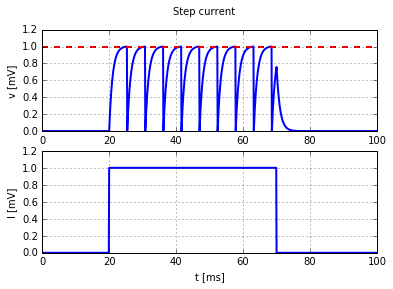

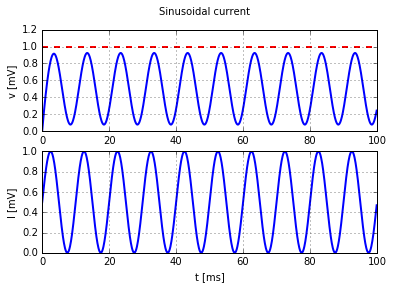

<StateMonitor, recording ['v', 'I'] from neurongroup_1>

In [1]:
#the following directive needed in notebooks only, not in your files
%matplotlib inline  

from neurodynex.leaky_integrate_and_fire.LIF import *
#run the examples:
LIF_Step()  # example Step
LIF_Sinus()  # example Sinus


** Question 2.1 ** Minimum current step amplitude.

- From the figure we see that the default current does not depolarize the neuron sufficiently. 
- But how can we change the input current? --> The exercise instructions are linked to the descriptions of the methods we provide --> read the API:

http://neuronaldynamics-exercises.readthedocs.org/en/latest/modules/neurodynex.leaky_integrate_and_fire.html#neurodynex.leaky_integrate_and_fire.LIF.LIF_Step

- How do we find the firing frequency? --> Look at the return values of the LIF_Step function and come up with some idea.

- Ok, we get a state monitor back. But what is that and how do I use it? --> read the Brian doc:

http://brian2.readthedocs.org/en/2.0b4/reference/brian2.monitors.statemonitor.StateMonitor.html#brian2.monitors.statemonitor.StateMonitor





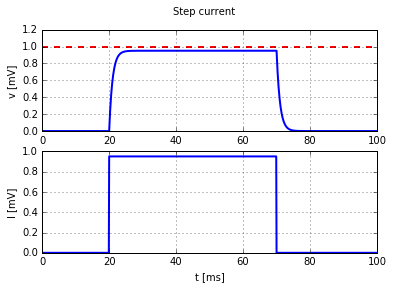

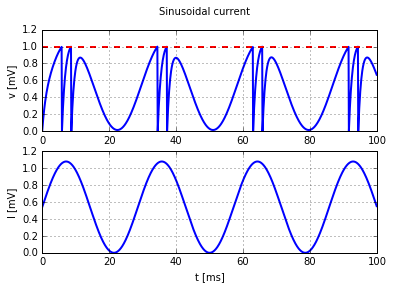

<StateMonitor, recording ['v', 'I'] from neurongroup_8>

In [27]:
stateMonitor = LIF_Step(I_tstart=20, I_tend=70, I_amp=0.95, tend=100, do_plot=True)
# you find the minimal spike triggering input current by changing I_amp 

# example with sinusoidal input:
LIF_Sinus(I_freq=0.035, I_offset=0.54, I_amp=0.54, tend=100, dt=0.1, do_plot=True)

<class 'brian2.monitors.statemonitor.StateMonitor'>
<class 'brian2.units.fundamentalunits.Quantity'>


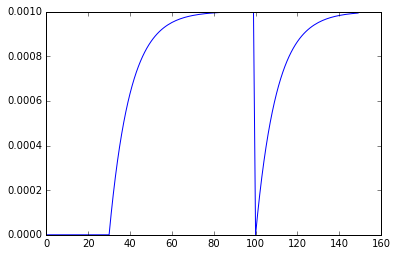

In [11]:
import matplotlib.pyplot as plt
#use the stateMonitor:
#run the neuron, do not plot automatically but use the return values:
stateMonitor = LIF_Step(I_tstart=3, I_tend=70, I_amp=1.001, tend=15, do_plot=False)
plt.plot(stateMonitor.v.T)

#how do we know to call .v.T ? 
#you can inspect the objects using type(). Then go to the documentation of that type.
print(type(stateMonitor))
print(type(stateMonitor.v))

(-0.0011, 0.0011)

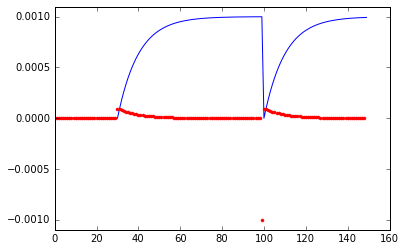

In [4]:
import numpy as np

# we now import units from Brian
# this is just a demo. Typically you would do
# from brian2 import *
from brian2.units import *

stateMonitor = LIF_Step(I_tstart=3, I_tend=70, I_amp=1.001, tend=15, do_plot=False)
allVoltages = stateMonitor.v
#the voltage monitor collects values with units. We have to remove
#the units before we can work with the array:
allValues = allVoltages / volt # this is a unit-safe way to get the scalars
# http://brian2.readthedocs.org/en/2.0b4/user/units.html

# we are interested in counting spikes. We can detect them by
# "Differentiating" the voltage trace. For this neuron model, the reset (large,
# hyperpolarization) is the signature of a spike as we see from the following figure
voltageChange = np.diff(allValues)

plt.plot(stateMonitor.v.T)
plt.plot(np.transpose(voltageChange), '.r')
plt.ylim((-0.0011,+0.0011))

In [16]:
# we now know how to detect spikes from the LIF neuron (note, this does 
# not work for a HH neuron!). We use that observation to implement a function which
# computes the firing frequency from a voltage monitor

def compute_firing_frequency(voltageStateMonitor, spikeAmplitude, totalDuration_ms):
    allValues = voltageStateMonitor / volt
    voltageChange = np.diff(allValues)
    # filter by predicate. see doc:
    # http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html
    spikes = voltageChange[np.where( voltageChange <= spikeAmplitude )]  
    nrOfSpikes = len(spikes)
    spikeFrequency = nrOfSpikes/totalDuration_ms*1000
    return (spikeFrequency, nrOfSpikes) #return two values


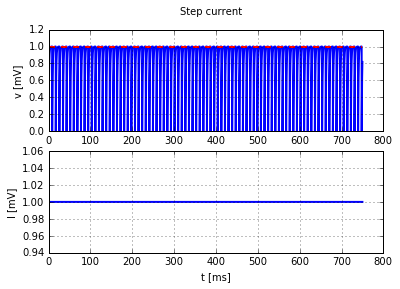

spikeFrequency = 116.0, nrOfSpikes=87


In [19]:
duration = 750
stateMonitor = LIF_Step(I_tstart=0, I_tend=9999, I_amp=1.0002, tend=duration, do_plot=True)
spikeFrequency, nrOfSpikes = compute_firing_frequency(stateMonitor.v, -0.00009, duration)
print("spikeFrequency = {0}, nrOfSpikes={1}".format(spikeFrequency,nrOfSpikes))


.........

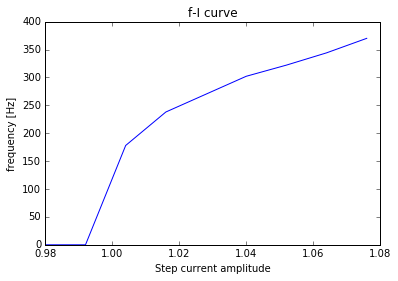

In [21]:
#we now have the tools to plot an f-I curve:
import sys
import numpy as np
from neurodynex.leaky_integrate_and_fire.LIF import *
from brian2.units import *


#inputCurrents = np.arange(0.98, 1.08, .012) #test a range of values
inputCurrents = np.array([0.95, .999, 1.001, 1.01, 1.05, 1.10]) #or provide specific values
frequencies = np.zeros(len(inputCurrents))
duration = 500
for i in range(0,len(inputCurrents)):
    I = inputCurrents[i]
    stateMonitor = LIF_Step(I_tstart=0, I_tend=duration, I_amp=I, tend=duration, do_plot=False)
    spikeFrequency, nrOfSpikes = compute_firing_frequency(stateMonitor.v, -0.00009, duration)
    sys.stdout.write(".")
    sys.stdout.flush() #show progress...
    frequencies[i] = spikeFrequency
plt.plot(inputCurrents, frequencies)
plt.xlabel("Step current amplitude")
plt.ylabel("frequency [Hz]")
plt.title("f-I curve")  


** Question 2.2 ** plot the amplitude and frequency gain and phase of the voltage oscillations as a function of the input current frequency


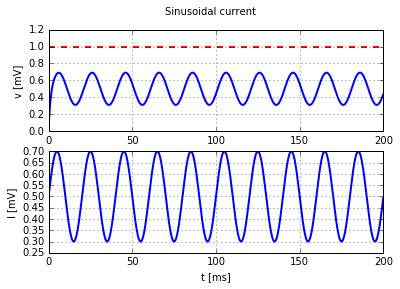

(1, 2000)
0.0


In [53]:
stateMonitor = LIF_Sinus(I_freq=.05, I_offset=0.5, I_amp=0.2, tend=200, dt=0.1, do_plot=True)
vm = stateMonitor.v / volt
print((vm.shape))
vm = vm
#use numpy min/max to get the amplitude. ignore the first 100 milliseconds 
min_vm = vm.min()
print(min_vm)


